# 数据分析
## 负荷周期性分析
以Area1为例

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('data/Area1_Load.csv')
print(data.head())
# 每一行的数据代表15分钟的间隔，需要获取每天的最大负荷、最小负荷、平均负荷
data['MaxLoad'] = data.iloc[:, 1:97].max(axis=1)
data['MinLoad'] = data.iloc[:, 1:97].min(axis=1)
data['MeanLoad'] = data.iloc[:, 1:97].mean(axis=1)
print(data.head())

          YMD        T0000        T0015        T0030        T0045  \
0  2009-01-01  3210.842464  3104.507008  3037.705984  2960.176288   
1  2009-01-02  2163.988288  2074.737568  1999.624960  1950.288448   
2  2009-01-03  3109.127008  3015.901120  2938.305664  2869.375744   
3  2009-01-04  3307.752544  3209.726368  3125.514016  3075.184864   
4  2009-01-05  3295.415776  3278.379328  3232.313632  3160.731232   

         T0100        T0115        T0130        T0145        T0200  ...  \
0  2889.226528  2827.697728  2772.514336  2720.470720  2666.586688  ...   
1  1889.142112  1846.489600  1800.414304  1778.308000  1746.278368  ...   
2  2815.772224  2777.295616  2725.377568  2704.334464  2665.855744  ...   
3  3028.708768  2995.458208  2956.236256  2926.631392  2893.666048  ...   
4  3124.226368  3092.294176  3064.081312  3034.584256  3007.335136  ...   

         T2130        T2145        T2200        T2215        T2230  \
0  3035.577568  3020.254336  2969.500960  2906.131840  2830.1513

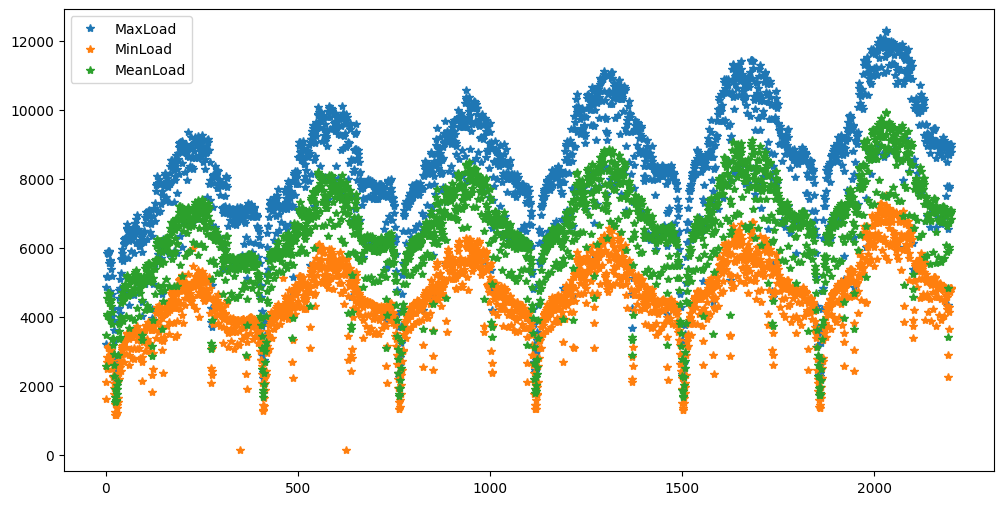

In [2]:
plt.figure(figsize=(12, 6))
plt.plot(data['MaxLoad'], marker='*', linestyle='None', label='MaxLoad')
plt.plot(data['MinLoad'], marker='*', linestyle='None', label='MinLoad')
plt.plot(data['MeanLoad'], marker='*', linestyle='None', label='MeanLoad')
plt.legend()
plt.show()

对比论文图片，发现存在为0的最小负荷

需要对缺失数据进行处理

![image.png](image\thesis\Daily_load_curve.png)

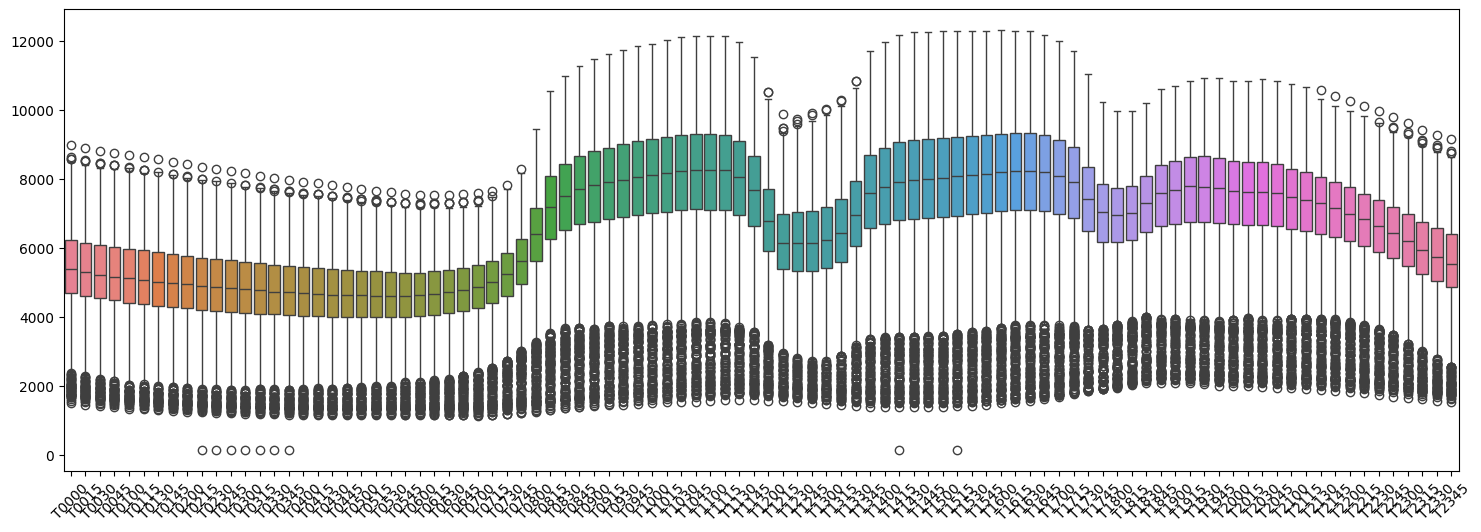

In [3]:
# 针对原数据的异常值进行处理
data.describe()

plt.figure(figsize=(18, 6))
sns.boxplot(data=data.iloc[:, 1:97])
plt.xticks(rotation=45)
plt.show()


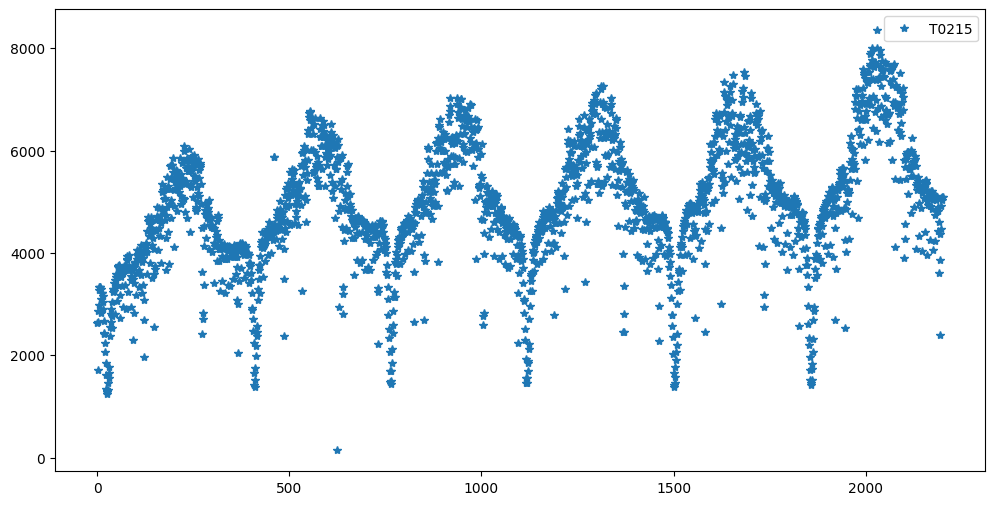

count    2201.000000
mean     4926.687159
std      1218.506330
min      1237.793824
25%      4202.440000
50%      4898.352832
75%      5718.603904
max      8350.854016
Name: T0215, dtype: float64

In [4]:
# 可以得出T0215~T0345，T1415，T1515存在异常值
# 查看异常值列的具体数据
data['T0215'].describe()
# 画图
plt.figure(figsize=(12, 6))
plt.plot(data['T0215'], marker='*', linestyle='None', label='T0215')
plt.legend()
plt.show()
# 将异常值替换为前一个值
data['T0215'] = np.where(data['T0215'] < 1000, data['T0215'].shift(1), data['T0215'])
data['T0215'].describe()


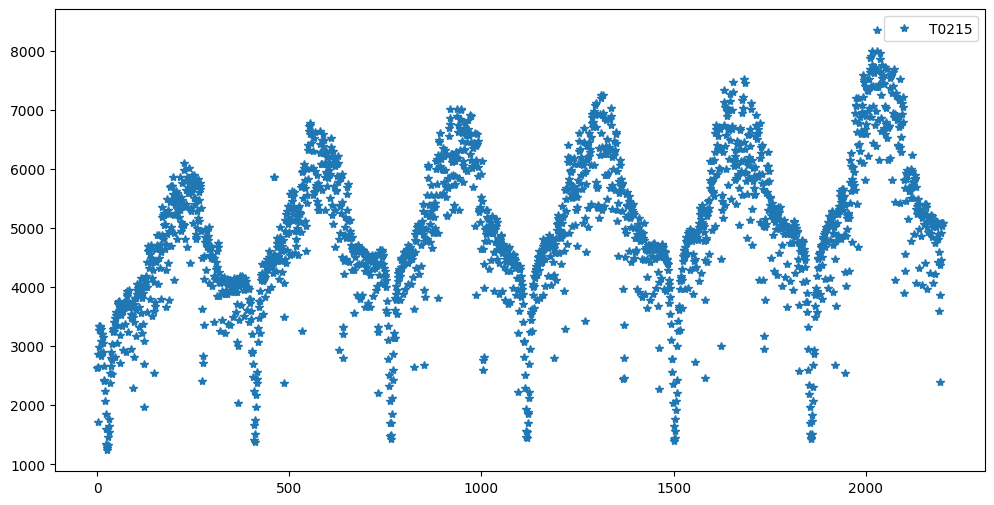

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data['T0215'], marker='*', linestyle='None', label='T0215')
plt.legend()
plt.show()

In [6]:
# 其他列同理T0215~T0345，T1415，T1515
data['T0230'] = np.where(data['T0230'] < 1000, data['T0230'].shift(1), data['T0230'])
data['T0245'] = np.where(data['T0245'] < 1000, data['T0245'].shift(1), data['T0245'])
data['T0300'] = np.where(data['T0300'] < 1000, data['T0300'].shift(1), data['T0300'])
data['T0315'] = np.where(data['T0315'] < 1000, data['T0315'].shift(1), data['T0315'])
data['T0330'] = np.where(data['T0330'] < 1000, data['T0330'].shift(1), data['T0330'])
data['T0345'] = np.where(data['T0345'] < 1000, data['T0345'].shift(1), data['T0345'])
data['T1415'] = np.where(data['T1415'] < 1000, data['T1415'].shift(1), data['T1415'])
data['T1515'] = np.where(data['T1515'] < 1000, data['T1515'].shift(1), data['T1515'])


### 年负荷周期性分析

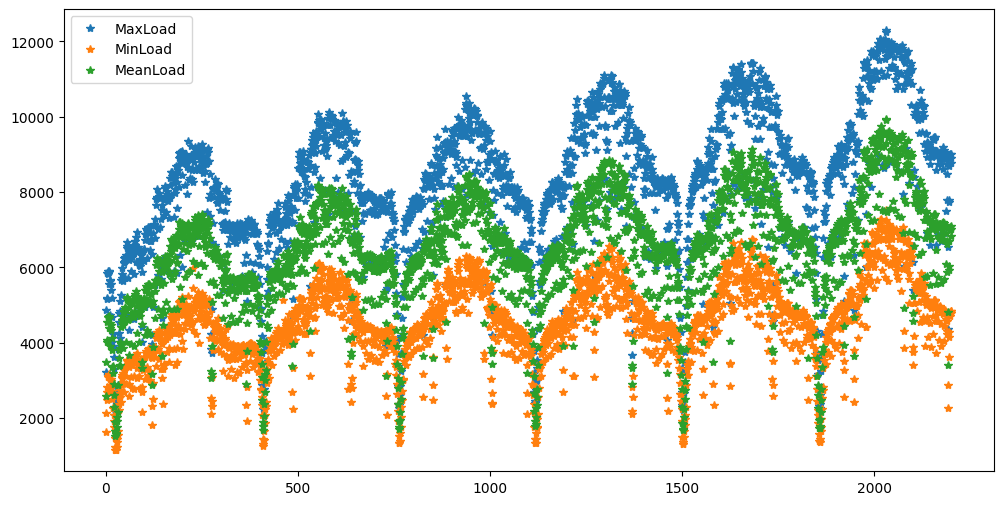

In [7]:
data['MaxLoad'] = data.iloc[:, 1:97].max(axis=1)
data['MinLoad'] = data.iloc[:, 1:97].min(axis=1)
data['MeanLoad'] = data.iloc[:, 1:97].mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(data['MaxLoad'], marker='*', linestyle='None', label='MaxLoad')
plt.plot(data['MinLoad'], marker='*', linestyle='None', label='MinLoad')
plt.plot(data['MeanLoad'], marker='*', linestyle='None', label='MeanLoad')
plt.legend()
plt.show()
# 保存处理后的数据
data.to_csv('data/Area1_Load_clean.csv', index=False)

### 季节负荷周期性分析

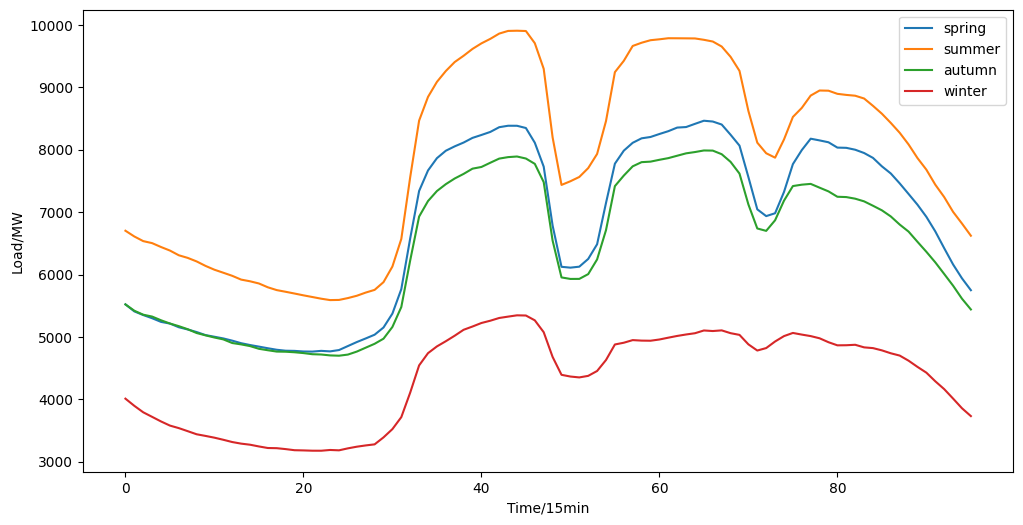

In [8]:
# 选取2011年的春夏秋冬的各一天进行数据可视化
data = pd.read_csv('data/Area1_Load_clean.csv')
spring = data[(data['YMD'] == '2011-04-15')]
summer = data[(data['YMD'] == '2011-07-15')]
autumn = data[(data['YMD'] == '2011-10-15')]
winter = data[(data['YMD'] == '2012-01-15')]
plt.figure(figsize=(12, 6))
plt.plot(range(len(spring.iloc[0, 1:97])), spring.iloc[0, 1:97], linestyle='-', label='spring')
plt.plot(range(len(summer.iloc[0, 1:97])), summer.iloc[0, 1:97], linestyle='-', label='summer')
plt.plot(range(len(autumn.iloc[0, 1:97])), autumn.iloc[0, 1:97], linestyle='-', label='autumn')
plt.plot(range(len(winter.iloc[0, 1:97])), winter.iloc[0, 1:97], linestyle='-', label='winter')
# 添加标签
plt.xlabel('Time/15min')
plt.ylabel('Load/MW')
plt.legend()
plt.show()


对比论文

![Seasonal_characteristic_curve_of_load.png](image\thesis\Seasonal_characteristic_curve_of_load.png)

### 周负荷周期性分析

In [9]:
# TODO:节假日权重更合理的分配

# 根据chinese——calendar包获取节假日信息
import chinese_calendar as calendar
from chinese_calendar import is_workday
# 对日期进行处理
data['YMD'] = pd.to_datetime(data['YMD'])
# 添加周几的信息
data['weekday'] = data['YMD'].dt.weekday
# 添加是否为工作日的信息
data['is_workday'] = data['YMD'].apply(is_workday).astype(int)
# 添加节假日的具体名称，如spring_festival等
# 加入节假日属性
Holiday = {"New Year's Day":10,"Spring Festival":30,"Tomb-sweeping Day":10,
           "Labour Day":10,"Dragon Boat Festival":10,
           "National Day":20,"Mid-autumn Festival":10}  # 创建一个空字典，用于存放节假日的名称和权重
Holiday_Info = [] # 创建一个空列表，用于存放节假日的权重
Holiday_Name = []  # 创建一个空列表，用于存放节假日的名称
time = pd.to_datetime(data['YMD'])  # 获取日期
for i in range(len(time)):  # 遍历日期
    t = time[i]  # 获取日期
    t_date = pd.to_datetime(t).date() # 将日期转换为时间格式
    on_holiday, holiday_name = calendar.get_holiday_detail(t_date)  # 获得节假日的布尔值和节假日名称
    if on_holiday == True:  # 如果是节假日
        if Holiday.get(holiday_name):  # 如果是列举节假日
            t_holiday = Holiday.get(holiday_name)  # 赋值为节假日的权重
        elif data['weekday'][i]>= 5:
            t_holiday = 5  # 如果是周末，权重赋值为5
        Holiday_Name.append(holiday_name)  # 将节假日名称添加到列表中
    else:
        t_holiday = 0  # 如果不是节假日，权重赋值为0
        Holiday_Name.append('None')
    Holiday_Info.append(t_holiday)  # 将权重添加到列表中

# Drop the existing "Holiday_Info" column if it already exists
if 'Holiday_Info' in data.columns:
    data = data.drop('Holiday_Info', axis=1)
if 'Holiday_Name' in data.columns:
    data = data.drop('Holiday_Name', axis=1)

data.insert(102,'Holiday_Info', Holiday_Info)
data.insert(103,'Holiday_Name', Holiday_Name)  # 将列表作为新的列插入到数据中

# 查看数据
print(data.head())
# 保存处理后的数据
data.to_csv('data/Area1_Load_clean.csv', index=False)

         YMD        T0000        T0015        T0030        T0045        T0100  \
0 2009-01-01  3210.842464  3104.507008  3037.705984  2960.176288  2889.226528   
1 2009-01-02  2163.988288  2074.737568  1999.624960  1950.288448  1889.142112   
2 2009-01-03  3109.127008  3015.901120  2938.305664  2869.375744  2815.772224   
3 2009-01-04  3307.752544  3209.726368  3125.514016  3075.184864  3028.708768   
4 2009-01-05  3295.415776  3278.379328  3232.313632  3160.731232  3124.226368   

         T0115        T0130        T0145        T0200  ...        T2315  \
0  2827.697728  2772.514336  2720.470720  2666.586688  ...  2485.757536   
1  1846.489600  1800.414304  1778.308000  1746.278368  ...  3587.174176   
2  2777.295616  2725.377568  2704.334464  2665.855744  ...  3774.541120   
3  2995.458208  2956.236256  2926.631392  2893.666048  ...  3767.990560   
4  3092.294176  3064.081312  3034.584256  3007.335136  ...  4295.259520   

         T2330        T2345      MaxLoad      MinLoad     Mean

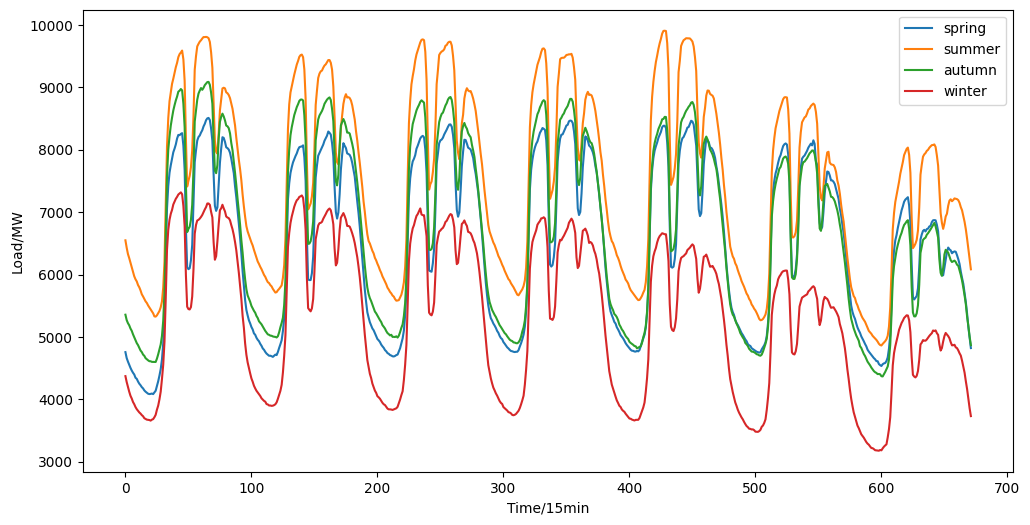

In [10]:
# 选取2011年的春夏秋冬的星期一到星期天进行数据可视化
data = pd.read_csv('data/Area1_Load_clean.csv')
data['YMD'] = pd.to_datetime(data['YMD'])
# 判断所给日期是否从星期一开始
spring_start_weekday = pd.to_datetime('2011-04-11')
summer_start_weekday = pd.to_datetime('2011-07-11')
autumn_start_weekday = pd.to_datetime('2011-10-10')
winter_start_weekday = pd.to_datetime('2012-01-09')
# 判断start_weekday是否为星期一
assert spring_start_weekday.weekday() == 0
assert summer_start_weekday.weekday() == 0
assert autumn_start_weekday.weekday() == 0
assert winter_start_weekday.weekday() == 0
# 获取每个季节的数据
spring_week = data[(data['YMD'] >= spring_start_weekday) & (data['YMD'] < spring_start_weekday + pd.Timedelta(days=7))]
summer_week = data[(data['YMD'] >= summer_start_weekday) & (data['YMD'] < summer_start_weekday + pd.Timedelta(days=7))]
autumn_week = data[(data['YMD'] >= autumn_start_weekday) & (data['YMD'] < autumn_start_weekday + pd.Timedelta(days=7))]
winter_week = data[(data['YMD'] >= winter_start_weekday) & (data['YMD'] < winter_start_weekday + pd.Timedelta(days=7))]
# 将每个季节的一周数据连续在一起
spring_week = spring_week.iloc[:, 1:97].values.flatten()
summer_week = summer_week.iloc[:, 1:97].values.flatten()
autumn_week = autumn_week.iloc[:, 1:97].values.flatten()
winter_week = winter_week.iloc[:, 1:97].values.flatten()
# 画图
plt.figure(figsize=(12, 6))
plt.plot(range(len(spring_week)), spring_week, linestyle='-', label='spring')
plt.plot(range(len(summer_week)), summer_week, linestyle='-', label='summer')
plt.plot(range(len(autumn_week)), autumn_week, linestyle='-', label='autumn')
plt.plot(range(len(winter_week)), winter_week, linestyle='-', label='winter')
# 添加标签
plt.xlabel('Time/15min')
plt.ylabel('Load/MW')
plt.legend()
plt.show()

对比论文

![load_cycle_characteristic_curve.png](image\thesis\load_cycle_characteristic_curve.png)

### 日期类型对负荷的影响

研究工作日、双休日、节假日对负荷的影响

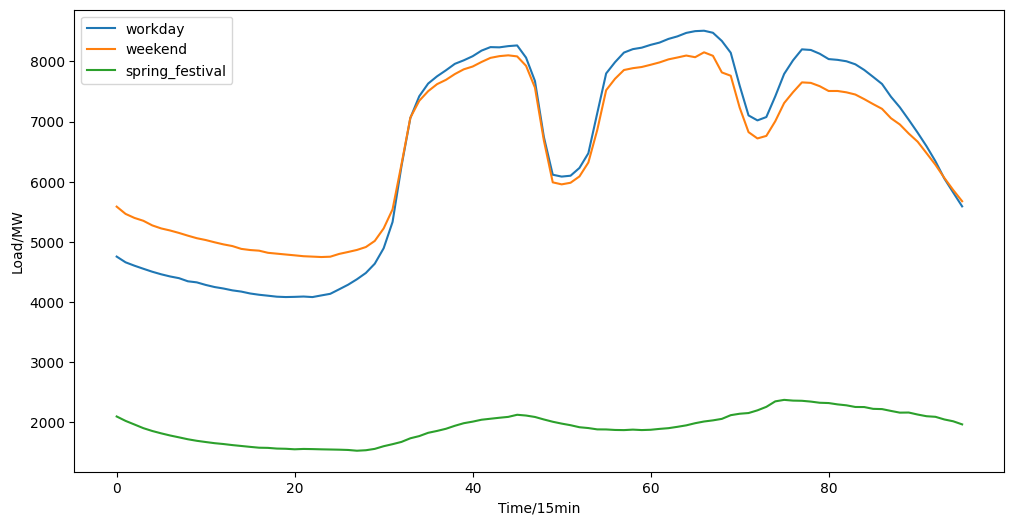

In [11]:
# 选取2011年的工作日、双休日、节假日中的一天进行数据可视化
data = pd.read_csv('data/Area1_Load_clean.csv')
data['YMD'] = pd.to_datetime(data['YMD'])
# 选取一个周一
workday = data[(data['YMD'] == '2011-04-11')]
assert workday['YMD'].dt.weekday.values[0] == 0
# 选取一个周六
weekend = data[(data['YMD'] == '2011-04-16')]
assert weekend['YMD'].dt.weekday.values[0] == 5
# 选取2011年的春节假期
holiday = data[(data['Holiday_Name'] == 'Spring Festival')]
spring_festival = holiday[(holiday['YMD'] == '2011-02-02')]
assert spring_festival['Holiday_Name'].values[0] == 'Spring Festival'
# 画图
plt.figure(figsize=(12, 6))
plt.plot(range(len(workday.iloc[0, 1:97])), workday.iloc[0, 1:97], linestyle='-', label='workday')
plt.plot(range(len(weekend.iloc[0, 1:97])), weekend.iloc[0, 1:97], linestyle='-', label='weekend')
plt.plot(range(len(spring_festival.iloc[0, 1:97])), spring_festival.iloc[0, 1:97], linestyle='-', label='spring_festival')
# 添加标签
plt.xlabel('Time/15min')
plt.ylabel('Load/MW')
plt.legend()
plt.show()


对比论文

![The_impact_curve_of_date_type_on_load](image\thesis\The_impact_curve_of_date_type_on_load.png)

## 不同因素对负荷的影响分析
### 温度对负荷的影响

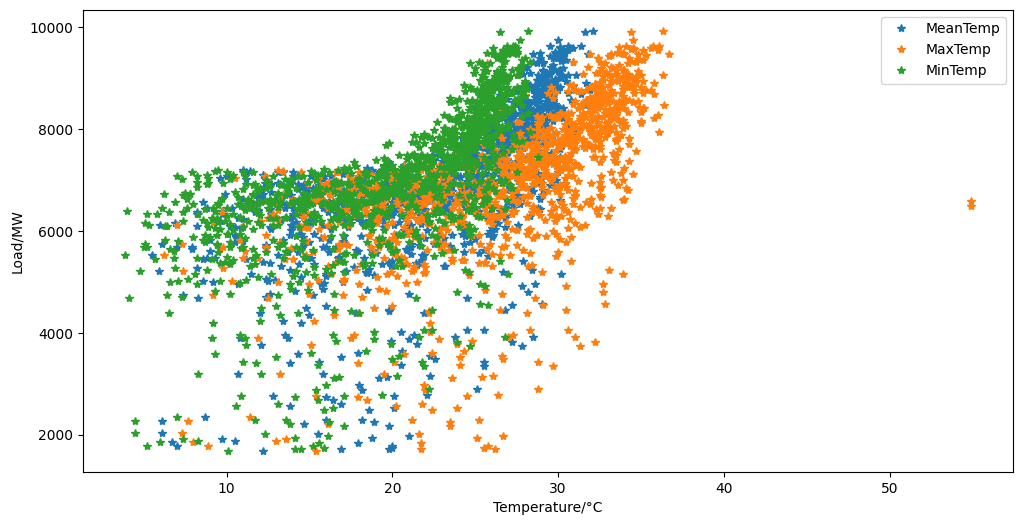

In [12]:
# 选取2012年-2014年的天气数据对负荷进行分析
data = pd.read_csv('data/Area1_Load_clean.csv')
weather = pd.read_csv('data/Area1_Weather.csv')
# 对日期进行处理
data['YMD'] = pd.to_datetime(data['YMD'])
weather['YMD'] = pd.to_datetime(weather['YMD'])
# 选取2012年-2014年的数据
data = data[(data['YMD'] >= '2012-01-01') & (data['YMD'] < '2015-01-17')]
weather = weather[(weather['YMD'] >= '2012-01-01') & (weather['YMD'] < '2015-01-17')]
# 将日平均气温、日最高气温、日最低气温对应的日平均负荷进行可视化
plt.figure(figsize=(12, 6))
plt.plot(weather['Avg_Temperature'], data['MeanLoad'], linestyle='None', marker='*', label='MeanTemp')
plt.plot(weather['Max_Temperature'], data['MeanLoad'], linestyle='None', marker='*', label='MaxTemp')
plt.plot(weather['Min_Temperature'], data['MeanLoad'], linestyle='None', marker='*', label='MinTemp')
# 添加标签
plt.xlabel('Temperature/°C')
plt.ylabel('Load/MW')
plt.legend()
plt.show()


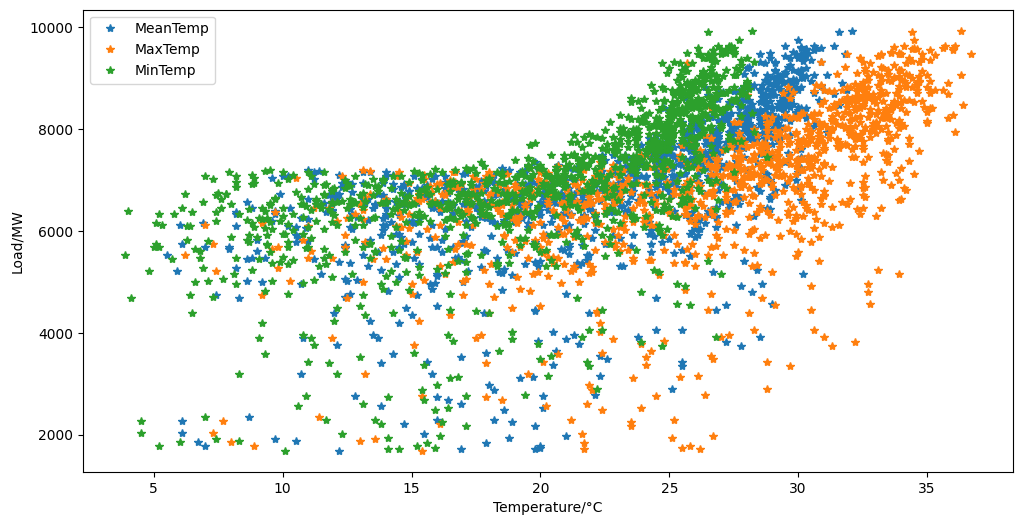

In [13]:
# 大于50度的温度数据显然是异常值
# 将异常值使用前一天的数据进行替换
weather['Max_Temperature'] = np.where(weather['Max_Temperature'] > 50, weather['Max_Temperature'].shift(1), weather['Max_Temperature'])
weather['Avg_Temperature'] = np.where(weather['Avg_Temperature'] > 50, weather['Avg_Temperature'].shift(1), weather['Avg_Temperature'])
weather['Min_Temperature'] = np.where(weather['Min_Temperature'] > 50, weather['Min_Temperature'].shift(1), weather['Min_Temperature'])
# 重新画图
plt.figure(figsize=(12, 6))
plt.plot(weather['Avg_Temperature'], data['MeanLoad'], linestyle='None', marker='*', label='MeanTemp')
plt.plot(weather['Max_Temperature'], data['MeanLoad'], linestyle='None', marker='*', label='MaxTemp')
plt.plot(weather['Min_Temperature'], data['MeanLoad'], linestyle='None', marker='*', label='MinTemp')
# 添加标签
plt.xlabel('Temperature/°C')
plt.ylabel('Load/MW')
plt.legend()
plt.show()
# 把处理后的数据保存
weather.to_csv('data/Area1_Weather_clean.csv', index=False)

对比论文

![The_impact_of_temperature_on_load](image\thesis\The_impact_of_temperature_on_load.png)

### 降雨对负荷的影响

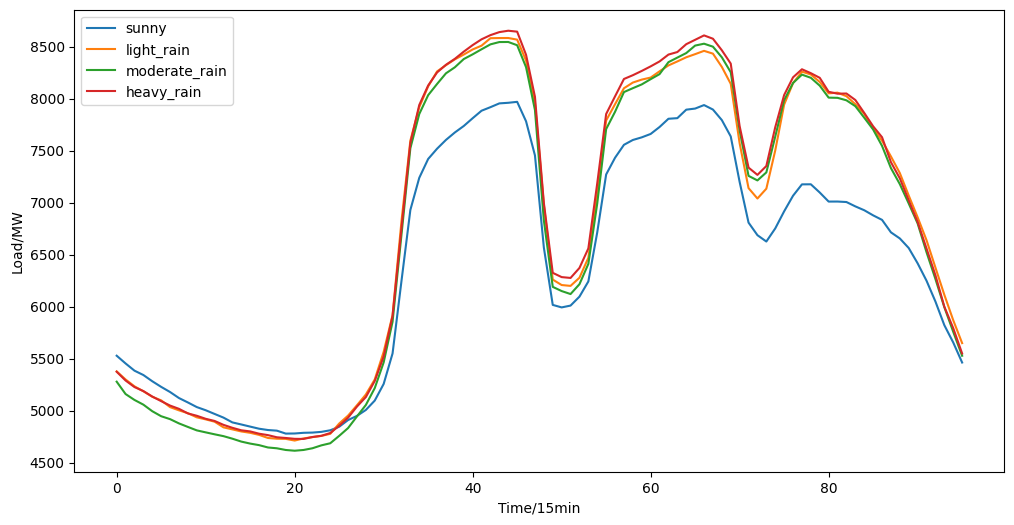

In [14]:
# 选取晴天、小雨、中雨、大雨的数据对负荷进行分析
data = pd.read_csv('data/Area1_Load_clean.csv')
weather = pd.read_csv('data/Area1_Weather_clean.csv')
# 对日期进行处理
data['YMD'] = pd.to_datetime(data['YMD'])
weather['YMD'] = pd.to_datetime(weather['YMD'])
# 选取2013年6月的数据，避免其他因素影响
weather = weather[(weather['YMD'] >= '2013-04-01') & (weather['YMD'] < '2013-05-01')]
# 选取晴天、小雨、中雨、大雨中的一天
sunny = weather[(weather['Rainfall'] == 0)].sample(1)
light_rain = weather[(weather['Rainfall'] > 0) & (weather['Rainfall'] <= 10)].sample(1)
moderate_rain = weather[(weather['Rainfall'] > 10) & (weather['Rainfall'] <= 25)].sample(1)
heavy_rain = weather[(weather['Rainfall'] > 25)].sample(1)
sunny = data[(data['YMD'] == sunny['YMD'].values[0])]
light_rain = data[(data['YMD'] == light_rain['YMD'].values[0])]
moderate_rain = data[(data['YMD'] == moderate_rain['YMD'].values[0])]
heavy_rain = data[(data['YMD'] == heavy_rain['YMD'].values[0])]
# 画图
plt.figure(figsize=(12, 6))
plt.plot(range(len(sunny.iloc[0, 1:97])), sunny.iloc[0, 1:97], linestyle='-', label='sunny')
plt.plot(range(len(light_rain.iloc[0, 1:97])), light_rain.iloc[0, 1:97], linestyle='-', label='light_rain')
plt.plot(range(len(moderate_rain.iloc[0, 1:97])), moderate_rain.iloc[0, 1:97], linestyle='-', label='moderate_rain')
plt.plot(range(len(heavy_rain.iloc[0, 1:97])), heavy_rain.iloc[0, 1:97], linestyle='-', label='heavy_rain')
# 添加标签
plt.xlabel('Time/15min')
plt.ylabel('Load/MW')
plt.legend()
plt.show()



对比论文

![The_impact_curve_of_rainfall_on_load.png](image\thesis\The_impact_curve_of_rainfall_on_load.png)

### 湿度对负荷的影响

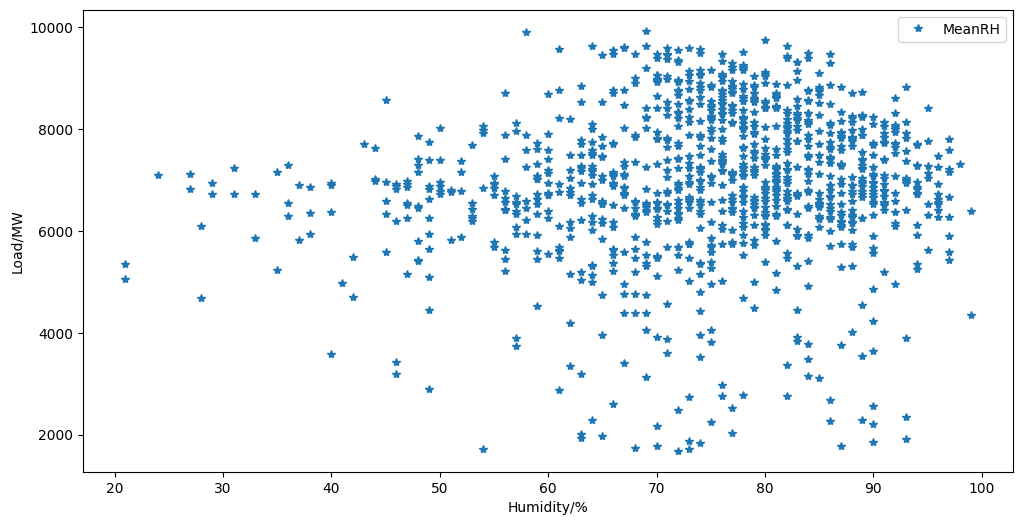

In [15]:
# 选取2012年-2014年的相对湿度数据对负荷进行分析
data = pd.read_csv('data/Area1_Load_clean.csv')
weather = pd.read_csv('data/Area1_Weather_clean.csv')
# 对日期进行处理
data['YMD'] = pd.to_datetime(data['YMD'])
weather['YMD'] = pd.to_datetime(weather['YMD'])
# 选取2012年-2014年的数据
data = data[(data['YMD'] >= '2012-01-01') & (data['YMD'] < '2015-01-01')]
weather = weather[(weather['YMD'] >= '2012-01-01') & (weather['YMD'] < '2015-01-01')]
# 将日平均相对湿度对应的日平均负荷进行可视化
plt.figure(figsize=(12, 6))
plt.plot(weather['Avg_Humidity'], data['MeanLoad'], linestyle='None', marker='*', label='MeanRH')
# 添加标签
plt.xlabel('Humidity/%')
plt.ylabel('Load/MW')
plt.legend()
plt.show()

对比论文

![The_impact_of_humidity_on_load.png](image\thesis\The_impact_of_humidity_on_load.png)

## 相关性分析
### 互相关性

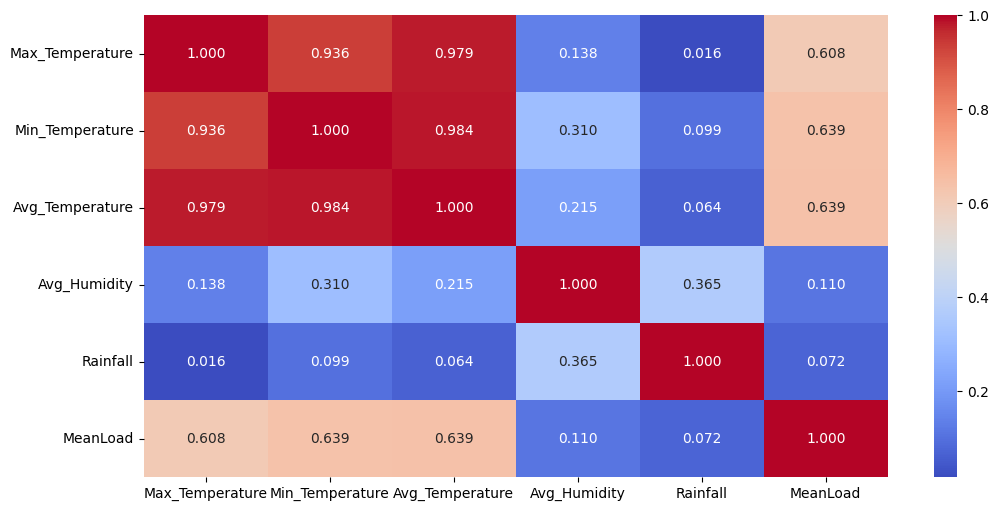

In [16]:
# 最高温度 最低温度 平均温度 相对湿度 降雨量与负荷的相关性
# 计算相关性
# 将天气的日期数据与日平均负荷数据合并
data = pd.read_csv('data/Area1_Load_clean.csv')
weather = pd.read_csv('data/Area1_Weather_clean.csv')
# 对日期进行处理
data['YMD'] = pd.to_datetime(data['YMD'])
weather['YMD'] = pd.to_datetime(weather['YMD'])
# 选取2012年-2014年的数据
data = data[(data['YMD'] >= '2012-01-01') & (data['YMD'] < '2015-01-01')]
weather = weather[(weather['YMD'] >= '2012-01-01') & (weather['YMD'] < '2015-01-01')]
# 合并日平均负荷数据与天气数据
weather = weather.drop(['YMD'], axis=1)
mean_load = data['MeanLoad'].values
weather.insert(5, 'MeanLoad', mean_load)

correlation = weather.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

对比论文

![Correlation_analysis_between_meteorological_factors_and_daily_average_load.png](image\thesis\Correlation_analysis_between_meteorological_factors_and_daily_average_load.png)

### 自相关

In [17]:
# 将负荷数据进行整合，由每隔15分钟改为每隔一小时
data = pd.read_csv('data/Area1_Load_clean.csv')
# 对日期进行处理
data['YMD'] = pd.to_datetime(data['YMD'])
# 时间格式为T0000,T0015,T0030,T0045,T0100,T0115,T0130,T0145,T0200
# 将T0000-T2300的数据整合成每日0-23点的数据
# 创建另一个DataFrame，用于存放整合后的数据
data_hour = pd.DataFrame()
# 遍历日期
for i in range(len(data)):
    # 获取日期
    t = data['YMD'][i]
    # 获取负荷数据
    load = data.iloc[i, 1:97:4].values
    # 创建一个新的DataFrame，用于存放整合后的数据,第一列为时间，包含年月日小时,第二列为Load
    temp = pd.DataFrame({'Time': pd.date_range(t, periods=24, freq='H'), 'Load': load})
    data_hour = pd.concat([data_hour, temp], axis=0)
print(data_hour.head())
# 保存处理后的数据
data_hour.to_csv('data/Area1_Load_hour.csv', index=False)

                 Time         Load
0 2009-01-01 00:00:00  3210.842464
1 2009-01-01 01:00:00  2889.226528
2 2009-01-01 02:00:00  2666.586688
3 2009-01-01 03:00:00  2531.124064
4 2009-01-01 04:00:00  2422.123744


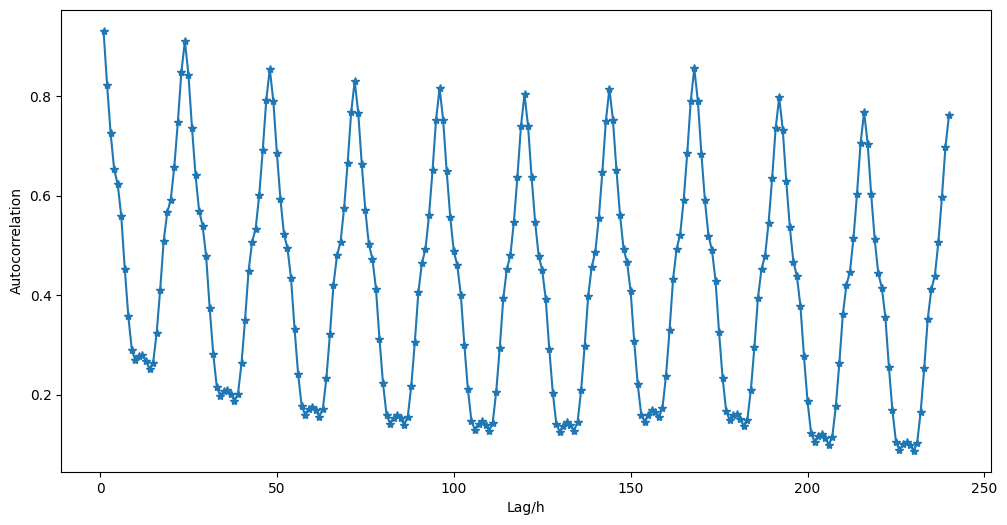

In [18]:
# 求自相关系数
data = pd.read_csv('data/Area1_Load_hour.csv')
# 对日期进行处理
data['Time'] = pd.to_datetime(data['Time'])
autocorrelation = []
# 求自相关系数
for i in range(1, 241):
    autocorrelation.append(data['Load'].autocorr(lag=i)) # 调用pandas的autocorr函数计算自相关系数
# 画图
plt.figure(figsize=(12, 6))
plt.plot(range(1, 241), autocorrelation, linestyle='-', marker='*')
plt.xlabel('Lag/h')
plt.ylabel('Autocorrelation')
plt.show()


最开始不知道pandas的autocorr函数，卡了挺久，这里其实应该不用转换成小时的操作

但是论文里隔4个一算，理解倒是没问题，但是这种格式的确实让我有点懵

索性直接改了，也方便之后拿小时预测

对比论文

![Load_autocorrelation_coefficient_graph.png](image\thesis\Load_autocorrelation_coefficient_graph.png)

## 数据标准化

In [19]:
# min-max 标准化
data = pd.read_csv('data/Area1_Load_clean.csv')
# 对负荷数据进行min-max标准化
data.iloc[:, 1:97] = (data.iloc[:, 1:97] - data.iloc[:, 1:97].min()) / (data.iloc[:, 1:97].max() - data.iloc[:, 1:97].min())
# 对MaxLoad、MinLoad、MeanLoad进行min-max标准化
data['MaxLoad'] = (data['MaxLoad'] - data['MaxLoad'].min()) / (data['MaxLoad'].max() - data['MaxLoad'].min())
data['MinLoad'] = (data['MinLoad'] - data['MinLoad'].min()) / (data['MinLoad'].max() - data['MinLoad'].min())
data['MeanLoad'] = (data['MeanLoad'] - data['MeanLoad'].min()) / (data['MeanLoad'].max() - data['MeanLoad'].min())
print(data.head())
# 保存处理后的数据
data.to_csv('data/Area1_Load_minmax.csv', index=False)

          YMD     T0000     T0015     T0030     T0045     T0100     T0115  \
0  2009-01-01  0.230007  0.222781  0.220160  0.213923  0.210429  0.206442   
1  2009-01-02  0.089938  0.084385  0.079692  0.077038  0.074386  0.071903   
2  2009-01-03  0.216398  0.210873  0.206709  0.201615  0.200437  0.199531   
3  2009-01-04  0.242974  0.236922  0.232041  0.229512  0.229403  0.229445   
4  2009-01-05  0.241323  0.246149  0.246493  0.241107  0.242396  0.242722   

      T0130     T0145     T0200  ...     T2315     T2330     T2345   MaxLoad  \
0  0.203060  0.200475  0.197665  ...  0.112407  0.104947  0.097424  0.109854   
1  0.069493  0.070108  0.069601  ...  0.253497  0.240231  0.227588  0.271953   
2  0.196583  0.198243  0.197563  ...  0.277499  0.263307  0.250869  0.303086   
3  0.228303  0.229002  0.229263  ...  0.276660  0.263322  0.255195  0.301295   
4  0.243121  0.243939  0.245081  ...  0.344203  0.328760  0.315162  0.368644   

    MinLoad  MeanLoad  weekday  is_workday  Holiday_Info

In [20]:
# z-score 标准化
data = pd.read_csv('data/Area1_Load_clean.csv')
# 对负荷数据进行z-score标准化
data.iloc[:, 1:97] = (data.iloc[:, 1:97] - data.iloc[:, 1:97].mean()) / data.iloc[:, 1:97].std()
# 对MaxLoad、MinLoad、MeanLoad进行z-score标准化
data['MaxLoad'] = (data['MaxLoad'] - data['MaxLoad'].mean()) / data['MaxLoad'].std()
data['MinLoad'] = (data['MinLoad'] - data['MinLoad'].mean()) / data['MinLoad'].std()
data['MeanLoad'] = (data['MeanLoad'] - data['MeanLoad'].mean()) / data['MeanLoad'].std()
print(data.head())
# 保存处理后的数据
data.to_csv('data/Area1_Load_zscore.csv', index=False)

          YMD     T0000     T0015     T0030     T0045     T0100     T0115  \
0  2009-01-01 -1.750461 -1.766814 -1.766895 -1.787616 -1.801500 -1.819766   
1  2009-01-02 -2.581685 -2.585684 -2.592921 -2.589513 -2.598053 -2.603461   
2  2009-01-03 -1.831225 -1.837273 -1.845990 -1.859716 -1.860005 -1.860022   
3  2009-01-04 -1.673513 -1.683143 -1.697024 -1.696294 -1.690404 -1.685775   
4  2009-01-05 -1.683308 -1.628551 -1.612040 -1.628366 -1.614326 -1.608431   

      T0130     T0145     T0200  ...     T2315     T2330     T2345   MaxLoad  \
0 -1.834941 -1.852645 -1.872561  ... -2.647837 -2.617522 -2.590897 -2.659935   
1 -2.615689 -2.613831 -2.621854  ... -1.800168 -1.805613 -1.810540 -1.775177   
2 -1.872799 -1.865681 -1.873156  ... -1.655968 -1.667125 -1.670969 -1.605247   
3 -1.687384 -1.686084 -1.687679  ... -1.661009 -1.667033 -1.645033 -1.615021   
4 -1.600768 -1.598868 -1.595132  ... -1.255215 -1.274310 -1.285521 -1.247424   

    MinLoad  MeanLoad  weekday  is_workday  Holiday_Info